This chapter introduces classification problems, classification using linear and logistic regression, K-nearest neighbors, and decision trees. You will also be briefly introduced to artificial neural networks as a type of classification technique.

**Ordinary Least Squares as a Classifier**

1.**OLS** particularly useful in understanding the process of classification.
2. OLS-based classifier is a non-probabilistic, linear binary classifier. 
3. It is a linear classifier as it has a linear relationship with respect to its parameters/coefficient.
4. Model may have a linear or non-linear decision boundary.linear models include OLS, SVM, and logistic regression,non-linear models include KNN, random forest, decision tree, and ANN.the decision boundary is defined as the hyperplane separating the data.

In [0]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [0]:
filepath = 'https://raw.githubusercontent.com/nileshgode/The-Supervised-Learning-Workshop/master/Chapter05/Datasets/linear_classifier.csv'

In [45]:
df = pd.read_csv(filepath,sep= ",")
df.head()

,x,y,labels
0,1,13,x
1,8,18,o
2,9,25,x
3,5,25,x
4,4,17,x


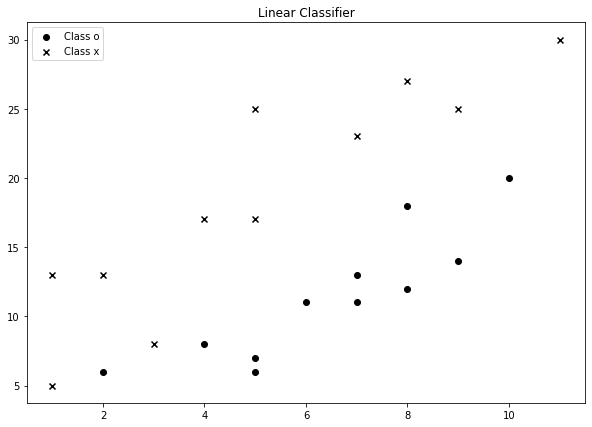

In [47]:
plt.figure(figsize=(10, 7))
for label, label_class in df.groupby('labels'):
    plt.scatter(label_class.values[:,0], label_class.values[:,1],
                label=f'Class {label}', marker=label, c='k')
plt.legend()
plt.title("Linear Classifier");

In [0]:
df_train, df_test = train_test_split(df.copy(), test_size=0.3, random_state=12)

In [48]:
# Fit a linear regression model
model = LinearRegression()
model.fit(df_train.x.values.reshape((-1, 1)), df_train.y.values.reshape((-1, 1)))
# Print out the parameters
print(f'y = {model.coef_[0][0]}x + {model.intercept_[0]}')

y = 1.5221402214022144x + 6.504920049200491


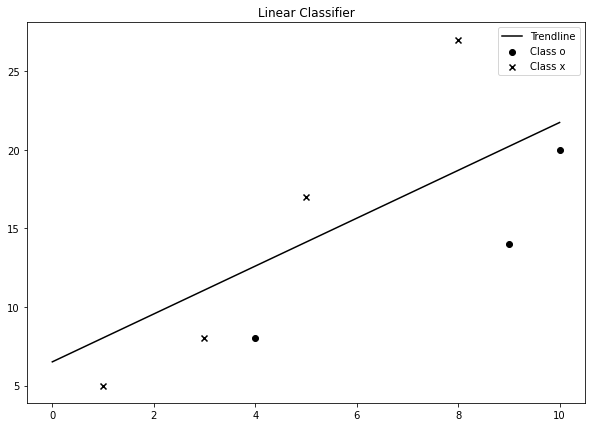

In [49]:
# Plot the trendline
trend = model.predict(np.linspace(0, 10).reshape((-1, 1)))
plt.figure(figsize=(10, 7))
for label, label_class in df_test.groupby('labels'):
    plt.scatter(label_class.values[:,0], label_class.values[:,1],
                label=f'Class {label}', marker=label, c='k')
plt.plot(np.linspace(0, 10), trend, c='k', label='Trendline')
plt.legend()
plt.title("Linear Classifier");

In [50]:
# Make predictions
y_pred = model.predict(df_test.x.values.reshape((-1, 1)))
pred_labels = []
for _y, _y_pred in zip(df_test.y, y_pred):
    if _y < _y_pred:
        pred_labels.append('o')
    else:
        pred_labels.append('x')
df_test['Pred Labels'] = pred_labels
df_test.head()

,x,y,labels,Pred Labels
7,4,8,o,o
10,5,17,x,x
21,3,8,x,o
15,1,5,x,o
14,9,14,o,o


Plot the points with the corresponding ground truth labels. For those points where the labels were correctly predicted, plot the corresponding class. For those incorrect predictions

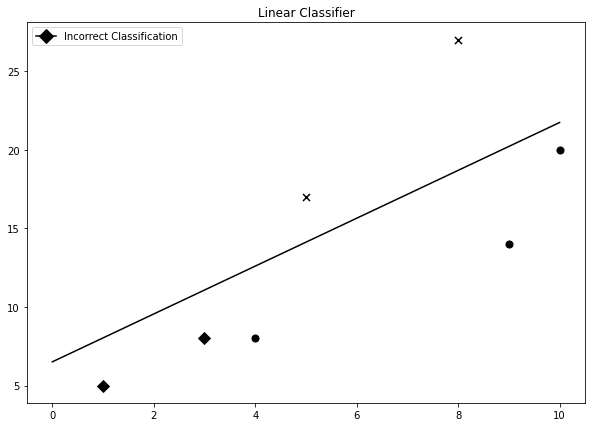

In [51]:
plt.figure(figsize=(10, 7))
for idx, label_class in df_test.iterrows():
    if label_class.labels != label_class['Pred Labels']:
        label = 'D'
        s=70
    else:
        label = label_class.labels
        s=50
    plt.scatter(label_class.values[0], label_class.values[1],
                label=f'Class {label}', marker=label, c='k', s=s)
      
plt.plot(np.linspace(0, 10), trend, c='k', label='Trendline')
plt.title("Linear Classifier");
incorrect_class = mlines.Line2D([], [], color='k', marker='D',
                          markersize=10, label='Incorrect Classification');
plt.legend(handles=[incorrect_class]);

But what if our dataset is not linearly separable and we cannot classify the data using a straight-line model

**Logistic Regression**

 Use the probability value for is selecting the predicted class by the classifier.the model outputting the probability and us deciding the predicted class lies the probability threshold value. We need to decide a threshold value, τ, between 0 and 1, such that the two classes (say, A and B) can then be defined as:
 1. Data samples with a model output probability between 0 and τ belong to class A.  
 2. Data samples with a model output probability between τ and 1 belong to class B.

 We need to import some more libraries


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

In [0]:
filepath1 = 'https://raw.githubusercontent.com/nileshgode/The-Supervised-Learning-Workshop/master/Chapter05/Datasets/breast-cancer-data.csv'

download the MNIST datasets

In [77]:
df = pd.read_csv(filepath1,sep= ",")
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


dissect the dataset into input (X) and output (y) variables:

In [0]:
X, y = df[[c for c in df.columns if c != 'diagnosis']], df.diagnosis

The next step is feature engineering. We use scikit-learn's select k best features sub-module under its feature selection module. Basically, this examines the power of each feature against the target output based on a scoring function.

In [80]:
# restricting to 3 best features so that we can visualize them on a plot, We can select different features values and build the model 
skb_model = SelectKBest(k=3)
X_new = skb_model.fit_transform(X, y)

# get the k - best column names
mask = skb_model.get_support()                 #list of booleans
selected_features = []                         # The list of your K best features
for bool, feature in zip(mask, df.columns):
    if bool:
        selected_features.append(feature)
print(selected_features)

['mean concave points', 'worst perimeter', 'worst concave points']


let's visualize how these two most important features correlate with the target (diagnosis) and how well they separate the two classes of diagnosis

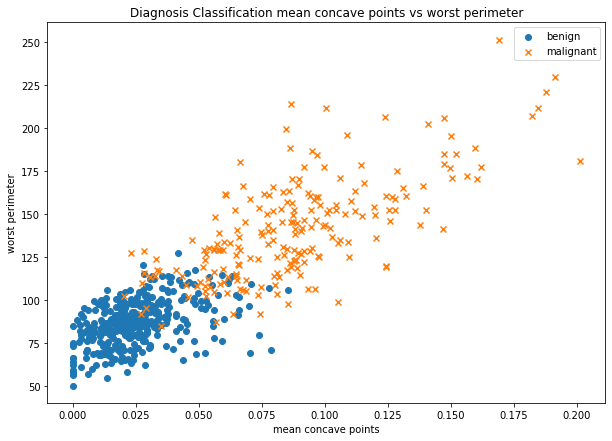

In [81]:
markers = {
    'benign': {'marker': 'o'},
    'malignant': {'marker': 'x'},
}
plt.figure(figsize=(10, 7))
for name, group in df.groupby('diagnosis'):
    plt.scatter(group[selected_features[0]], group[selected_features[1]], 
                label=name,
                marker=markers[name]['marker'],
               )
    
plt.title(f'Diagnosis Classification {selected_features[0]} vs {selected_features[1]}');
plt.xlabel(selected_features[0]);
plt.ylabel(selected_features[1]);
plt.legend();

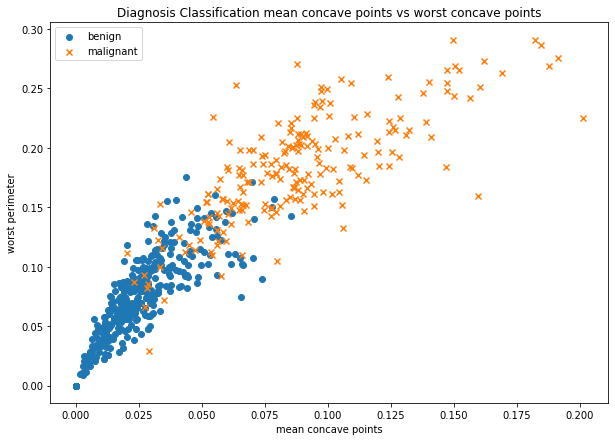

In [82]:
markers = {
    'benign': {'marker': 'o'},
    'malignant': {'marker': 'x'},
}
plt.figure(figsize=(10, 7))
for name, group in df.groupby('diagnosis'):
    plt.scatter(group[selected_features[0]], group[selected_features[2]], 
                label=name,
                marker=markers[name]['marker'],
               )
    
plt.title(f'Diagnosis Classification {selected_features[0]} vs {selected_features[2]}');
plt.xlabel(selected_features[0]);
plt.ylabel(selected_features[1]);
plt.legend();

Before we can construct the model, we must first convert the diagnosis values into labels that can be used within the model

In [0]:
diagnoses = [
    'benign', # 0
    'malignant' # 1
]
output = [diagnoses.index(diag) for diag in df.diagnosis]

In [0]:
train_X, valid_X, train_y, valid_y = train_test_split(df[selected_features], output, test_size=0.2, random_state=123)

In [86]:
model = LogisticRegression(solver='liblinear')
model.fit(df[selected_features], output)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
model.score(valid_X, valid_y)

0.956140350877193

In [88]:
selected_features = [
    'mean radius', # List features here
    'mean texture',
    'compactness error'
]
train_X, valid_X, train_y, valid_y = train_test_split(df[selected_features], output, 
                                                      test_size=0.2, random_state=123)
model = LogisticRegression(solver='liblinear')
model.fit(train_X, train_y)
model.score(valid_X, valid_y)

0.8859649122807017

This reduced accuracy shows that indeed, using the two most important features renders a more powerful model than using three randomly chosen features.

Construct another model using all the available information and compare performance

In [96]:
selected_features = [
    feat for feat in df.columns if feat != 'diagnosis'                   # List features here
]
train_X, valid_X, train_y, valid_y = train_test_split(df[selected_features], output, test_size=0.3, random_state=123)
model = LogisticRegression(solver='liblinear')
model.fit(train_X, train_y)
model.score(valid_X, valid_y)

0.9824561403508771

This improvement in performance by using all the features shows that even those features that are not among the most important ones do still play a role in improving model performance.

**Classification Using K-Nearest Neighbors**

The K-nearest neighbors (KNN) classifier. KNN is a non-probabilistic, non-linear classifier. It does not predict the probability of a class. Also, as it does not learn any parameters, there is no linear combination of parameters and, thus, it is a non-linear model:

1. KNN is one of the simplest "learning" algorithms available for data classification.
2. KNN doesn't really learn from the data and encode these learnings in parameters or weights like other methods
3. KNN uses instance-based or lazy learning in that it simply stores or memorizes all the training samples and the corresponding classes.
4. when a test sample is provided to the algorithm for class prediction, it uses a majority vote of the k-nearest points to determine the corresponding class. 
5. Selecting the class on the basis of the smallest Euclidean distance to the nearest pointApplying a weighting function to bias the test point toward those neighbors that are closer
6. KNN models have the ability to form extremely complex non-linear boundaries, which can be advantageous in classifying images or datasets with highly non-linear boundaries.
7. KNN models can be highly sensitive to local features in the data, given that the classification process is only really dependent on the nearby points.
8. As KNN models memorize all the training information to make predictions, they can struggle with generalizing to new, unseen data.
9. There is another variant of KNN, which, rather than specifying the number of nearest neighbors, specifies the size of the radius around the test point at which to look. This method, known as the radius neighbors classification

we will be using the KNN classification algorithm to build a model on the Breast Cancer Diagnosis dataset and evaluate its performance by calculating its accuracy:

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split

In [98]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


we need to choose the most appropriate features from the dataset for use with the classifier. We could simply select all 30 features. However, as this exercise is designed to allow visualization of the KNN process, we will arbitrarily only select the mean radius and worst radius. Construct a scatterplot for mean radius versus worst radius for each of the classes in the dataset with the corresponding diagnosis type:

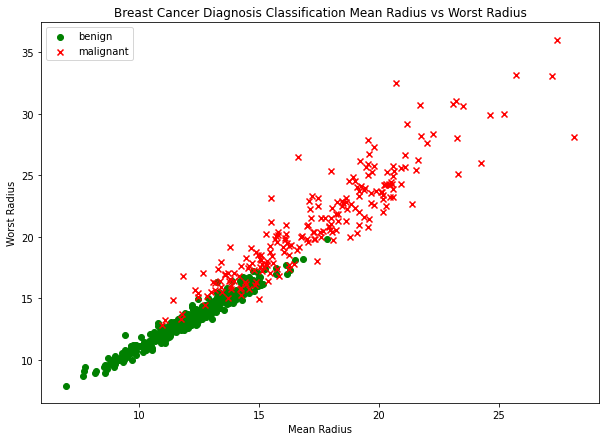

In [99]:
markers = {
    'benign': {'marker': 'o', 'facecolor': 'g', 'edgecolor': 'g'},
    'malignant': {'marker': 'x', 'facecolor': 'r', 'edgecolor': 'r'},
}
plt.figure(figsize=(10, 7))
for name, group in df.groupby('diagnosis'):
    plt.scatter(group['mean radius'], group['worst radius'], 
                label=name,
                marker=markers[name]['marker'],
                facecolors=markers[name]['facecolor'],
                edgecolor=markers[name]['edgecolor'])
    
plt.title('Breast Cancer Diagnosis Classification Mean Radius vs Worst Radius');
plt.xlabel('Mean Radius');
plt.ylabel('Worst Radius');
plt.legend();

In [0]:
train_X, valid_X, train_y, valid_y = train_test_split(df[['mean radius', 'worst radius']], df.diagnosis, test_size=0.3, random_state=121)

In [104]:
model = KNN(n_neighbors=3)
model.fit(X=train_X, y=train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [105]:
model.score(X=valid_X, y=valid_y)

0.935672514619883

**Visualizing KNN Boundaries**

In [0]:
from matplotlib.colors import ListedColormap

In [107]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [0]:
spacing = 0.1
mean_radius_range = np.arange(df['mean radius'].min() - 1, df['mean radius'].max() + 1, spacing)
worst_radius_range = np.arange(df['worst radius'].min() - 1, df['worst radius'].max() + 1, spacing)

In [0]:
xx, yy = np.meshgrid(mean_radius_range, worst_radius_range) # Create the mesh

In [110]:
xx

array([[ 5.981,  6.081,  6.181, ..., 28.881, 28.981, 29.081],
       [ 5.981,  6.081,  6.181, ..., 28.881, 28.981, 29.081],
       [ 5.981,  6.081,  6.181, ..., 28.881, 28.981, 29.081],
       ...,
       [ 5.981,  6.081,  6.181, ..., 28.881, 28.981, 29.081],
       [ 5.981,  6.081,  6.181, ..., 28.881, 28.981, 29.081],
       [ 5.981,  6.081,  6.181, ..., 28.881, 28.981, 29.081]])

In [111]:
yy

array([[ 6.93,  6.93,  6.93, ...,  6.93,  6.93,  6.93],
       [ 7.03,  7.03,  7.03, ...,  7.03,  7.03,  7.03],
       [ 7.13,  7.13,  7.13, ...,  7.13,  7.13,  7.13],
       ...,
       [36.83, 36.83, 36.83, ..., 36.83, 36.83, 36.83],
       [36.93, 36.93, 36.93, ..., 36.93, 36.93, 36.93],
       [37.03, 37.03, 37.03, ..., 37.03, 37.03, 37.03]])

In [112]:
pred_x = np.c_[xx.ravel(), yy.ravel()] # Concatenate the results
pred_x

array([[ 5.981,  6.93 ],
       [ 6.081,  6.93 ],
       [ 6.181,  6.93 ],
       ...,
       [28.881, 37.03 ],
       [28.981, 37.03 ],
       [29.081, 37.03 ]])

In [121]:
labelled_diagnoses = [
    'benign',
    'malignant',
]
for idx, label in enumerate(labelled_diagnoses):
    df.diagnosis = df.diagnosis.replace(label, idx)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [122]:
pred_y = model.predict(pred_x).reshape(xx.shape)
pred_y

array([['benign', 'benign', 'benign', ..., 'malignant', 'malignant',
        'malignant'],
       ['benign', 'benign', 'benign', ..., 'malignant', 'malignant',
        'malignant'],
       ['benign', 'benign', 'benign', ..., 'malignant', 'malignant',
        'malignant'],
       ...,
       ['malignant', 'malignant', 'malignant', ..., 'malignant',
        'malignant', 'malignant'],
       ['malignant', 'malignant', 'malignant', ..., 'malignant',
        'malignant', 'malignant'],
       ['malignant', 'malignant', 'malignant', ..., 'malignant',
        'malignant', 'malignant']], dtype=object)

In [0]:
# Create color maps
cmap_light = ListedColormap(['#6FF6A5', '#F6A56F',])
cmap_bold = ListedColormap(['#0EE664', '#E6640E',])

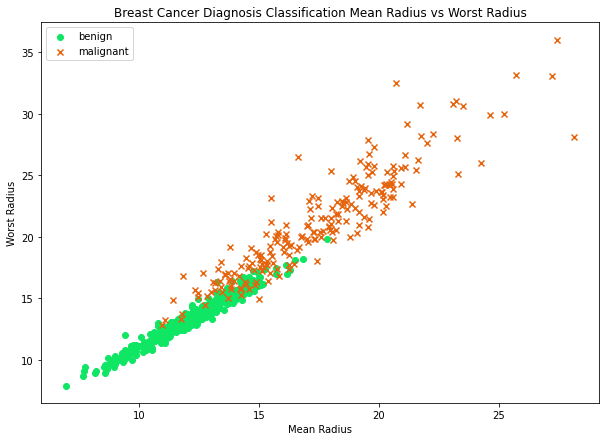

In [118]:
markers = {
    'benign': {'marker': 'o', 'facecolor': 'g', 'edgecolor': 'g'},
    'malignant': {'marker': 'x', 'facecolor': 'r', 'edgecolor': 'r'},
}
plt.figure(figsize=(10, 7))
for name, group in df.groupby('diagnosis'):
    diagnoses = labelled_diagnoses[name]
    plt.scatter(group['mean radius'], group['worst radius'],
                c=cmap_bold.colors[name],
                label=labelled_diagnoses[name],
                marker=markers[diagnoses]['marker']
               )
    
plt.title('Breast Cancer Diagnosis Classification Mean Radius vs Worst Radius');
plt.xlabel('Mean Radius');
plt.ylabel('Worst Radius');
plt.legend();

**Classification Using Decision Trees**

There are a number of different machine learning algorithms that fall within the overall umbrella of decision trees, such as **Iterative Dichotomiser 3 (ID3) **and **Classification and Regression Tree (CART).**

The ID3 algorithm aims to classify the data on the basis of each decision providing the largest information gain. To further understand this design, we also need to understand two additional concepts: entropy and information gain.

Entropy: In simple terms, entropy shows the degree of uncertainty of the signal.

Information gain: This quantifies the amount of uncertainty reduced if we have prior information about a variable a (the variable will be a feature in the case of machine learning models). In other words, how much information can variable a provide regarding an event. 

**ID3 Classification**

In [123]:
df = pd.DataFrame()
df['Outlook'] = [
    'sunny', 'sunny', 'overcast', 'rain', 'rain', 'rain',
    'overcast', 'sunny', 'sunny', 'rain', 'sunny',
    'overcast', 'overcast', 'rain'
]
df['Temperature'] = [
    'hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool',
    'mild', 'cool', 'mild', 'mild', 'mild', 'hot', 'mild',
]
df['Humidity'] = [
    'high', 'high', 'high', 'high', 'normal', 'normal', 'normal', 
    'high', 'normal', 'normal', 'normal', 'high', 'normal', 'high'
]
df['Windy'] = [
    'Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak',
    'Strong', 'Strong', 'Weak', 'Strong'
]
df['Decision'] = [
    'N', 'N', 'P', 'P', 'P', 'N', 'P', 'N', 'P', 'P',
    'P', 'P', 'P', 'N'
]
df

,Outlook,Temperature,Humidity,Windy,Decision
0,sunny,hot,high,Weak,N
1,sunny,hot,high,Strong,N
2,overcast,hot,high,Weak,P
3,rain,mild,high,Weak,P
4,rain,cool,normal,Weak,P
5,rain,cool,normal,Strong,N
6,overcast,cool,normal,Strong,P
7,sunny,mild,high,Weak,N
8,sunny,cool,normal,Weak,P
9,rain,mild,normal,Weak,P


 The ID3 algorithm starts by taking a small sample of the training set at random and fitting the tree to this window. This can be a useful method for large datasets, but given that ours is quite small, we will simply start with the entire training set. The first step is to calculate the entropy for the Decision column, where there are two possible values, or classes, P and N:

In [124]:
# Probability of P
p_p = len(df.loc[df.Decision == 'P']) / len(df)
# Probability of N
p_n = len(df.loc[df.Decision == 'N']) / len(df)
entropy_decision = -p_n * np.log2(p_n) - p_p * np.log2(p_p)
print(f'H(S) = {entropy_decision:0.4f}')

H(S) = 0.9403


In [0]:
def f_entropy_decision(data):
    p_p = len(data.loc[data.Decision == 'P']) / len(data)
    p_n = len(data.loc[data.Decision == 'N']) / len(data)
    return -p_n * np.log2(p_n) - p_p * np.log2(p_p)

In [127]:
IG_decision_Outlook = entropy_decision # H(S)
# Create a string to print out the overall equation
overall_eqn = 'Gain(Decision, Outlook) = Entropy(Decision)' 
# Iterate through the values for outlook and compute the probabilities
# and entropy values
for name, Outlook in df.groupby('Outlook'):
    num_p = len(Outlook.loc[Outlook.Decision == 'P'])
    num_n = len(Outlook.loc[Outlook.Decision != 'P'])
    num_Outlook = len(Outlook)
    print(f'p(Decision=P|Outlook={name}) = {num_p}/{num_Outlook}')
    print(f'p(Decision=N|Outlook={name}) = {num_n}/{num_Outlook}')    
    print(f'p(Outlook={name}) = {num_Outlook}/{len(df)}')
    print(f'Entropy(Decision|Outlook={name}) = '\
         f'-{num_p}/{num_Outlook}.log2({num_p}/{num_Outlook}) - '\
         f'{num_n}/{num_Outlook}.log2({num_n}/{num_Outlook})')
    
    entropy_decision_outlook = 0
    
    # Cannot compute log of 0 so add checks
    if num_p != 0:
        entropy_decision_outlook -= (num_p / num_Outlook) \
            * np.log2(num_p / num_Outlook)
     
    # Cannot compute log of 0 so add checks
    if num_n != 0:
        entropy_decision_outlook -= (num_n / num_Outlook) \
            * np.log2(num_n / num_Outlook)
    
    IG_decision_Outlook -= (num_Outlook / len(df)) * entropy_decision_outlook
    print()
    overall_eqn += f' - p(Outlook={name}).'
    overall_eqn += f'Entropy(Decision|Outlook={name})'
print(overall_eqn)
print(f'Gain(Decision, Outlook) = {IG_decision_Outlook:0.4f}')

p(Decision=P|Outlook=overcast) = 4/4
p(Decision=N|Outlook=overcast) = 0/4
p(Outlook=overcast) = 4/14
Entropy(Decision|Outlook=overcast) = -4/4.log2(4/4) - 0/4.log2(0/4)

p(Decision=P|Outlook=rain) = 3/5
p(Decision=N|Outlook=rain) = 2/5
p(Outlook=rain) = 5/14
Entropy(Decision|Outlook=rain) = -3/5.log2(3/5) - 2/5.log2(2/5)

p(Decision=P|Outlook=sunny) = 2/5
p(Decision=N|Outlook=sunny) = 3/5
p(Outlook=sunny) = 5/14
Entropy(Decision|Outlook=sunny) = -2/5.log2(2/5) - 3/5.log2(3/5)

Gain(Decision, Outlook) = Entropy(Decision) - p(Outlook=overcast).Entropy(Decision|Outlook=overcast) - p(Outlook=rain).Entropy(Decision|Outlook=rain) - p(Outlook=sunny).Entropy(Decision|Outlook=sunny)
Gain(Decision, Outlook) = 0.2467


We need to repeat this process quite a few times, so wrap it in a function for ease of use later:

In [0]:
def IG(data, column, ent_decision=entropy_decision):
    IG_decision = ent_decision
    for name, temp in data.groupby(column):
        p_p = len(temp.loc[temp.Decision == 'P']) / len(temp)
        p_n = len(temp.loc[temp.Decision != 'P']) / len(temp)
        entropy_decision = 0
        if p_p != 0:
            entropy_decision -= (p_p) * np.log2(p_p)
        if p_n != 0:
            entropy_decision -= (p_n) * np.log2(p_n)
        IG_decision -= (len(temp) / len(df)) * entropy_decision
    return IG_decision

Repeat this process for each of the other columns to compute the corresponding information gain:

In [129]:
for col in df.columns[:-1]:
    print(f'Gain(Decision, {col}) = {IG(df, col):0.4f}')

Gain(Decision, Outlook) = 0.2467
Gain(Decision, Temperature) = 0.0292
Gain(Decision, Humidity) = 0.1518
Gain(Decision, Windy) = 0.0481


This information provides the first decision of the tree. We want to split on the maximum information gain, so we split on Outlook. Look at the data splitting on Outlook:

In [130]:
for name, temp in df.groupby('Outlook'):
    print('-' * 15)
    print(name)
    print('-' * 15)
    print(temp)
    print('-' * 15)

---------------
overcast
---------------
     Outlook Temperature Humidity   Windy Decision
2   overcast         hot     high    Weak        P
6   overcast        cool   normal  Strong        P
11  overcast        mild     high  Strong        P
12  overcast         hot   normal    Weak        P
---------------
---------------
rain
---------------
   Outlook Temperature Humidity   Windy Decision
3     rain        mild     high    Weak        P
4     rain        cool   normal    Weak        P
5     rain        cool   normal  Strong        N
9     rain        mild   normal    Weak        P
13    rain        mild     high  Strong        N
---------------
---------------
sunny
---------------
   Outlook Temperature Humidity   Windy Decision
0    sunny         hot     high    Weak        N
1    sunny         hot     high  Strong        N
7    sunny        mild     high    Weak        N
8    sunny        cool   normal    Weak        P
10   sunny        mild   normal  Strong        P
---------

We now repeat this process, splitting by information gain until all the data is allocated and all branches of the tree terminate. First, remove the overcast samples, as they no longer provide any additional information:

In [131]:
df_next = df.loc[df.Outlook != 'overcast']
df_next

,Outlook,Temperature,Humidity,Windy,Decision
0,sunny,hot,high,Weak,N
1,sunny,hot,high,Strong,N
3,rain,mild,high,Weak,P
4,rain,cool,normal,Weak,P
5,rain,cool,normal,Strong,N
7,sunny,mild,high,Weak,N
8,sunny,cool,normal,Weak,P
9,rain,mild,normal,Weak,P
10,sunny,mild,normal,Strong,P
13,rain,mild,high,Strong,N


So, the last set of data that requires classification is the rainy outlook data. Extract only the rain data and rerun the entropy calculation:

In [132]:
df_rain = df_next.loc[df_next.Outlook == 'rain']
entropy_decision = f_entropy_decision(df_rain)
entropy_decision

0.9709505944546686

Repeat the gain calculation with the rain subset:

In [133]:
for col in df_rain.columns[1:-1]:
    print(f'Gain(Decision, {col}) = {IG(df_rain, col, entropy_decision):0.4f}')

Gain(Decision, Temperature) = 0.6313
Gain(Decision, Humidity) = 0.6313
Gain(Decision, Windy) = 0.9710


Again, splitting on the attribute with the largest gain value requires splitting on the Windy values. So, group the remaining information by Windy:

In [134]:
for name, temp in df_rain.groupby('Windy'):
    print('-' * 15)
    print(name)
    print('-' * 15)
    print(temp)
    print('-' * 15)

---------------
Strong
---------------
   Outlook Temperature Humidity   Windy Decision
5     rain        cool   normal  Strong        N
13    rain        mild     high  Strong        N
---------------
---------------
Weak
---------------
  Outlook Temperature Humidity Windy Decision
3    rain        mild     high  Weak        P
4    rain        cool   normal  Weak        P
9    rain        mild   normal  Weak        P
---------------


1. Decision trees, very much like KNN models, are discriminative models.
2. Discriminative models are the models that aim to maximize the conditional probability of the class of data given the features. 
3. The opposite of discriminative models is generative models, which learn the joint probability of data classes and features and, hence, learn the distribution of data to generate artificial samples.

hopefully, you have a reasonable understanding of the underlying concept of decision trees and the process of making sequential decisions. With the principles of decision trees in our toolkit, we will now look at applying a more complicated model using the functionality provided in scikit-learn.


**Classification and Regression Tree (CART)**

1. provides the ability to use decision trees in both classification and regression problems. 
2. CART differs from ID3 in that the decisions are made by comparing the values of features against a calculated value. ID3 serves the purpose well when data is categorical
3. Once data becomes continuous, CART is used, which calculates the threshold value for comparison with a feature value. And because, in such comparisons, there can only be two possible outcomes – (a) the feature value is greater than (or equal to) the threshold value or, (b) the feature value is less than (or equal to) the threshold value – hence, CART results in binary trees.whereas ID3 creates multiway trees.
4. CART uses measure called the **gini impurity** measure. 
5. Conceptually, this is a measure of the following: if we randomly pick a data point in our dataset and if we randomly classify (label) it according to the class distribution in the dataset, then what is the probability of classifying the data point incorrectly?


In [0]:
from sklearn.tree import DecisionTreeClassifier

In [137]:
df = pd.read_csv(filepath1,sep= ",")
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [0]:
train_X, valid_X, train_y, valid_y = train_test_split(df[set(df.columns)-{'diagnosis'}], df.diagnosis, test_size=0.3, random_state=123)

In [139]:
model = DecisionTreeClassifier()
model = model.fit(train_X, train_y)
model.score(train_X, train_y)

1.0

In [140]:
model.score(valid_X, valid_y)

0.9239766081871345

In [141]:
!conda install python-graphviz

/bin/bash: conda: command not found


In [0]:
import graphviz
from sklearn.tree import export_graphviz

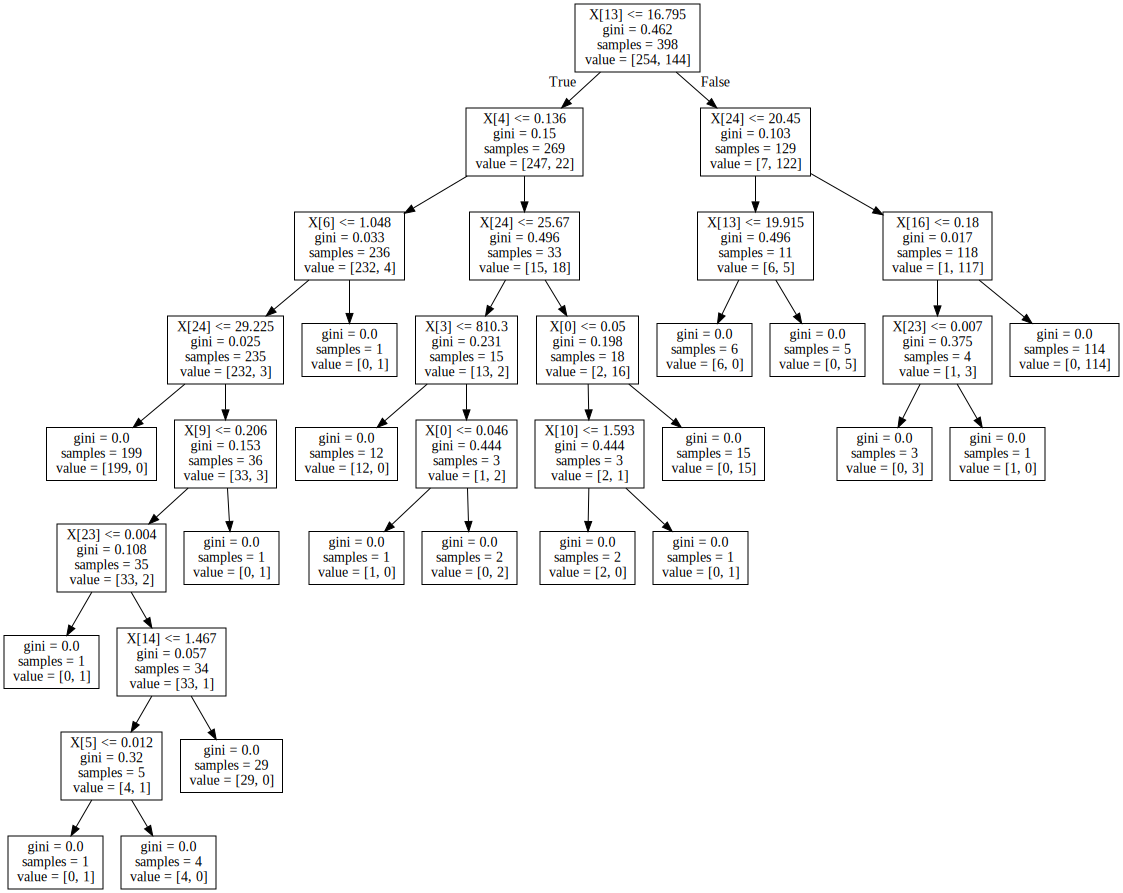

In [143]:
dot_data = export_graphviz(model, out_file=None)
graph = graphviz.Source(dot_data)
graph

This figure illustrates the decisions of the CART decision tree in the scikit-learn model.

The terminating condition can be defined in several ways. Some of them are as follows:
1. The tree has been exhausted and all terminating leaves have been constructed/found.
2. Impurity (the measure of the different number of classes that the elements in a node belong to) at a particular node is below a given threshold.
3. The number of elements at a particular node is lower than a threshold number of elements.

**Breast Cancer Diagnosis Classification Using Artificial Neural Networks**

In [0]:
from sklearn.neural_network import MLPClassifier

In [145]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [0]:
X, y = df[[c for c in df.columns if c != 'diagnosis']], df.diagnosis

The next step is feature engineering. Different columns of this dataset have different scales of magnitude; hence, before constructing and training a neural network model, we normalize the dataset. For this, we use the MinMaxScaler API from sklearn, which normalizes each column's values between 0 and 1

In [0]:
from sklearn import preprocessing

In [0]:
X_array = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
X_array_scaled = min_max_scaler.fit_transform(X_array)
X = pd.DataFrame(X_array_scaled, columns=X.columns)

In [150]:
X = pd.DataFrame(X_array_scaled, columns=X.columns)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [0]:
diagnoses = [
    'benign', # 0
    'malignant', # 1
]
output = [diagnoses.index(diag) for diag in y]

In [0]:
train_X, valid_X, train_y, valid_y = train_test_split(X, output, test_size=0.2, random_state=123)

In [154]:
model = MLPClassifier(solver='sgd', hidden_layer_sizes=(100,), max_iter=1000, random_state=1, 
                      learning_rate_init=.01)
model.fit(X=train_X, y=train_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [155]:
model.score(valid_X, valid_y)

0.9824561403508771